In [ ]:
pip install emoji


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 20.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=5db39dc85a50284f63b2cee913f1441c46b07f266ae29e357d862369de5e58c2
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import regex
import google.colab
import pandas as pd
import numpy as np
import emoji
import re
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
% matplotlib inline

In [ ]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

The Next Function finds the author of different messages

In [ ]:

def FindAuthor(s):
      s=s.split(":")
      if len(s)==2:
         return True
      else:
          return False

The Next Function is separate info so that it can be used in pandas

In [ ]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [ ]:
from google.colab import files
uploaded = files.upload()
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversation = 'Whatsapp.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Saving Whatsapp.txt to Whatsapp (8).txt


In [ ]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df.tail(200)

,Date,Time,Author,Message
3,2021-08-28,2:02 PM,+254 700 177140,The meetup is now live! 🔴 We’ll be talking ab...
4,2021-08-28,2:48 PM,+254 759 360020,"Thank you so much Ian, Learned a bunch of cool..."
5,2021-08-28,2:49 PM,+254 700 177140,Thanks a lot too @254759360020 🙏😊 Today we ta...
6,2021-08-28,4:14 PM,+254 759 258369,Looking for a professional Android Developer t...
7,2021-09-03,7:08 AM,None,+254 700 794696 left
...,...,...,...,...
198,2022-05-20,11:00 AM,+254 700 177140,<Media omitted>
199,2022-05-20,11:00 AM,+254 700 177140,<Media omitted>
200,2022-05-20,11:00 AM,+254 700 177140,<Media omitted>
201,2022-05-20,11:00 AM,+254 700 177140,<Media omitted>


In [ ]:
df.Author.unique()

array([None, '+254 700 177140', '+254 759 360020', '+254 759 258369',
       '+254 701 609514', 'frank', '+254 728 329173', '+254 707 039052',
       '+254 714 680763', '+254 775 431105', '+254 723 220536',
       '+254 727 761646', '+254 713 493092', '+254 737 973882',
       '+254 713 817384', '+254 742 726831', '+254 704 156418',
       '+254 738 965737', '+254 708 263715', '+254 758 402932',
       '+254 758 291548', '+255 692 297 996', '+255 744 294 409',
       '+254 726 723044'], dtype=object)

In [ ]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)

29


In [ ]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    return emoji_list

In [ ]:
df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)

0


In [ ]:
total_messages = df['Message'].count()
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Hackaton Community Message Pattern")
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)
print("Messages:", total_messages)


Hackaton Community Message Pattern
Media: 29
Emojis: 0
Links: 31
Messages: 203


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 0 to 202
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      174 non-null    datetime64[ns]
 1   Time      174 non-null    object        
 2   Author    133 non-null    object        
 3   Message   174 non-null    object        
 4   emoji     174 non-null    object        
 5   urlcount  174 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
l = ["frank", "+254 700 177140", "+254 738 965737"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of frank -
Messages Sent 7
Words per message 5.0
Media Messages Sent 0
Emojis Sent 0
Links Sent 0

Stats of +254 700 177140 -
Messages Sent 62
Words per message 26.822580645161292
Media Messages Sent 27
Emojis Sent 0
Links Sent 14

Stats of +254 738 965737 -
Messages Sent 4
Words per message 4.75
Media Messages Sent 0
Emojis Sent 0
Links Sent 0



In [ ]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

Author name frank


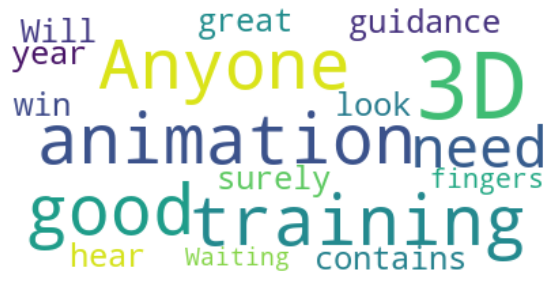

Author name +254 700 177140


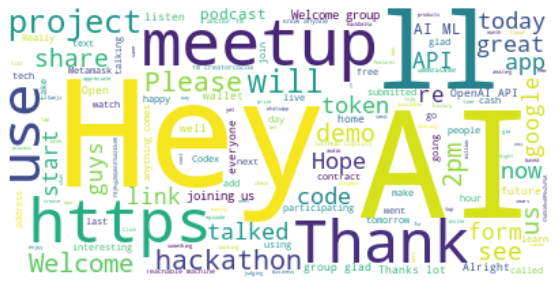

Author name +255 744 294 409


ValueError: ignored

In [ ]:
l = ["frank", "+254 700 177140", "+255 744 294 409"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()